In [ ]:
!pip install pytest-warnings

In [ ]:
#import the warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

#Step:1 - Import and inspect dataset

In [ ]:
housing_data = pd.read_csv('train.csv')
housing_data

In [ ]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
housing_data.shape

In [ ]:
housing_data.describe()

In [ ]:
housing_data.info()

In [ ]:
housing_data.isnull().sum()/housing_data.shape[0]*100

# Step:02 - Data Cleaning



In [ ]:
cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
        "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

for i in cols:
  housing_data[i].fillna("None",inplace = True)

housing_data.info()

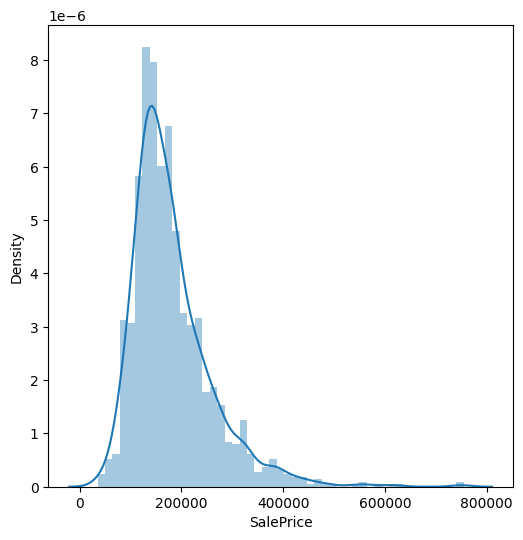

In [ ]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Checking if the target variable SalePrice in normally distributed or any skewness
plt.figure(figsize=(6,6))
sns.distplot(housing_data['SalePrice'])
plt.show()

### We can see that the target variable is right skewed

In [ ]:
print("Skewness: ",housing_data["SalePrice"].skew())
print("Kurtosis: ",housing_data["SalePrice"].kurtosis())     # Kurtosis: It is the measure of tailedness of a distribution i.e. How often the outilers is gonna be occurring

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


#### We can observe that target variable has skewness greater than 1 and has high density around SalePrice of 16k. Hence we can do data transformation (Here we're gonna do Logarithmic) for this variable



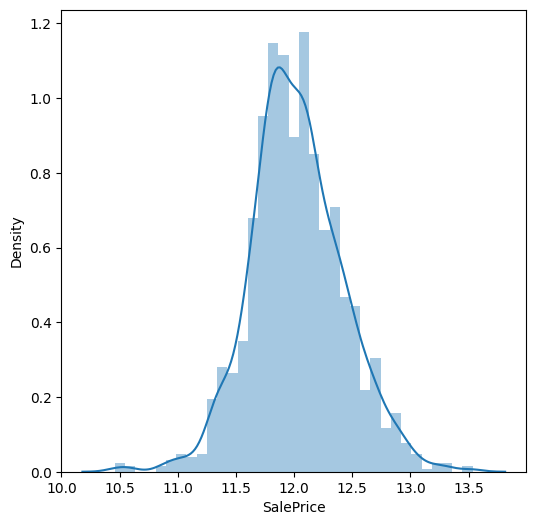

In [ ]:
# Logrithmic Transformation
housing_data["SalePrice"] = np.log(housing_data["SalePrice"])

plt.figure(figsize=(6,6))
sns.distplot(housing_data['SalePrice'])
plt.show()

In [ ]:
print("Skewness: ",housing_data["SalePrice"].skew())
print("Kurtosis: ",housing_data["SalePrice"].kurtosis())

Skewness:  0.12133506220520406
Kurtosis:  0.8095319958036296


#### We can now a normal distribution and skewness & Kurtosis are reduced

#### > Drop ID column

#### > Convert 'MSSubClass', 'OverallQual', 'OverallCond' to object DataType
#### > Convert 'LogFrontage', 'MasVnrArea' to numerical DataType

In [ ]:
housing_data.drop("Id", axis=1, inplace=True)
housing_data[["MSSubClass","OverallQual","OverallCond"]] = housing_data[["MSSubClass","OverallQual","OverallCond"]].astype(str)
housing_data["LotFrontage"] = pd.to_numeric(housing_data["LotFrontage"])
housing_data["MasVnrArea"] = pd.to_numeric(housing_data["MasVnrArea"])
housing_data.info()

In [ ]:
null_cols = housing_data.columns[housing_data.isnull().any()]

In [ ]:
for i in null_cols:
    if housing_data[i].dtype == np.float64 or housing_data[i].dtype == np.int64:
        housing_data[i].fillna(housing_data[i].mean(), inplace=True)
    else:
        mode_value = housing_data[i].mode()
        if not mode_value.empty:  # Check if mode() returned a non-empty result
            housing_data[i].fillna(mode_value[0], inplace=True)
        else:
            # Handle case when there's no mode (e.g., all values are NaN)
            housing_data[i].fillna('Unknown', inplace=True)

In [ ]:
housing_data.isna().sum()

# Step 3: Exploratory Data Analysis on the dataset

In [ ]:
# List of Categorical Columns
cat_cols = housing_data.select_dtypes(include="object").columns
cat_cols

#List of Numerical Columns
num_cols = housing_data.select_dtypes(exclude='object').columns
num_cols

# Univariant Analysis

In [ ]:
# Numerical Columns
# Plotting Box Plot to visualize the distribution and check for any outliers
for i in num_cols:
  plt.figure(figsize=(8,6))
  sns.boxplot(housing_data[i])
  plt.show()

#### From the Above box plot, We can see outliers in LotFrontage, LotArea, YearBulit, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, BedroomAbvGr, KitchenAbrGr, TotRmAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice

In [ ]:
# Numerical Columns
# Plotting Box Plot to visualize the distribution
for i in cat_cols:
  plt.figure(figsize=(5,5))
  chart = housing_data[i].value_counts(normalize=True)
  print(chart)
  chart.plot.pie(labeldistance=None, autopct = '%1.2F%%')
  plt.legend()
  print("-------------------------------------------------------------------------------------")
  plt.show()

#### >From the Above pie plot, We can look percentage values in categorical columns and we can infer that , "MS Zoning", 'Street', 'landContour', 'Utilities', 'LotConfiguration' , 'LandSlope'etc......

#### > All these columns are having more than 70% of a distribution in a single category.

# Bivariate/ Mulitvariate Analysis on the dataset

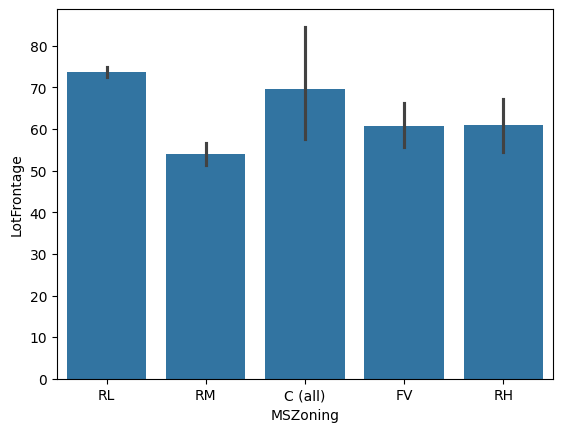

In [ ]:
# Plot of MSZoning v/s LotFrontage
sns.barplot(x='MSZoning',y='LotFrontage',data = housing_data)
plt.show()

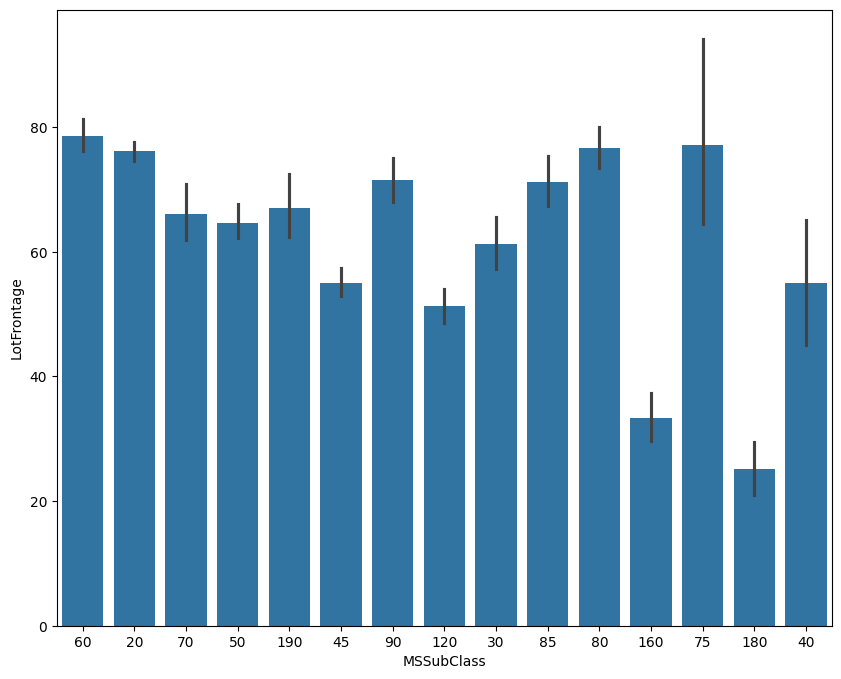

In [ ]:
# Plot of MSSubClass v/s LotFrontage
plt.figure(figsize=(10,8))
sns.barplot(x='MSSubClass',y='LotFrontage',data = housing_data)
plt.show()

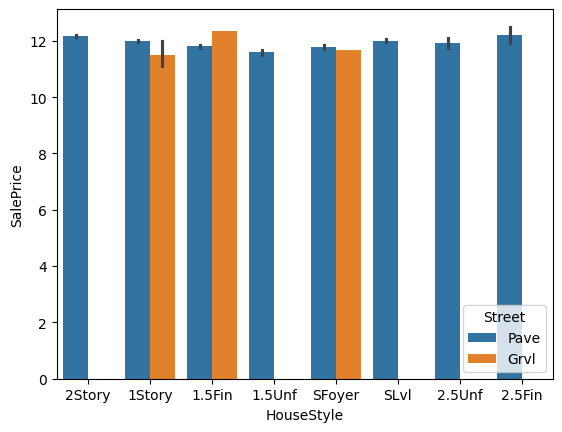

In [ ]:
# Plot of HouseStyle v/s SalePrice based on Street
sns.barplot(x='HouseStyle',y='SalePrice',hue='Street' ,data = housing_data)
plt.show()

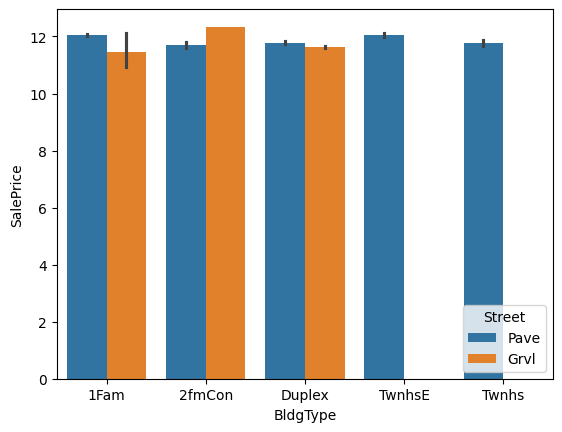

In [ ]:
# Plot of BldgType v/s SalePrice
sns.barplot(x='BldgType', y='SalePrice', hue='Street', data= housing_data)
plt.show()

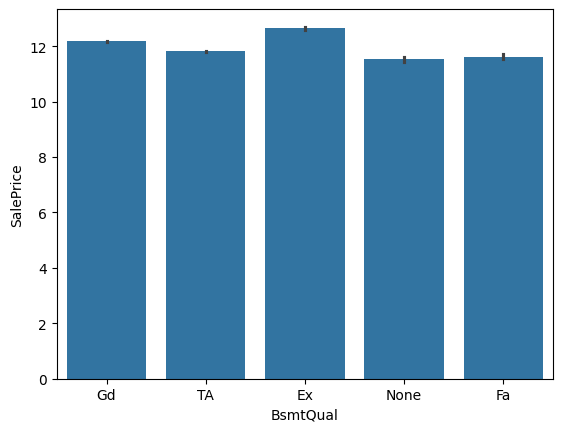

In [ ]:
# Plot of BsmtQual v/s SalePrice
sns.barplot(x='BsmtQual', y='SalePrice',data= housing_data)
plt.show()

# Conclusion :

### > We can see that RL(Residential Low Density) has the highest LotFrontage   and RM (Residential Medium Density) has the least.
### > We can see that 2-STORY 1946 and NEWER has the highest LotFrontage and PUD - MULTILEVEL - INCL SPLIT LEV/FOYER has the least.
### > The SalePrice is not showing much variance with respect to the Style of Dwelling (one story/ two story)
### > The SalePrice is almost same for all the Building Types(Types of Dwelling) and the Basement Quality, so there is no significant pattern.


In [ ]:
# Calculating Age of the property
housing_data['Age'] = housing_data["YrSold"] - housing_data["YearBuilt"]
housing_data["Age"].head()

In [ ]:
housing_data.drop(["YearBuilt","YrSold"], axis=1, inplace=True)

# Correlation between Numerical Columns

In [ ]:
plt.figure(figsize=[25,25])
sns.heatmap(housing_data.corr(numeric_only = True),annot=True,cmap ='BuPu')
plt.title("Correlation Between Numerical Columns")
plt.show()

In [ ]:
housing_data.corr(numeric_only = True)

##### Get top 10 correlated columns

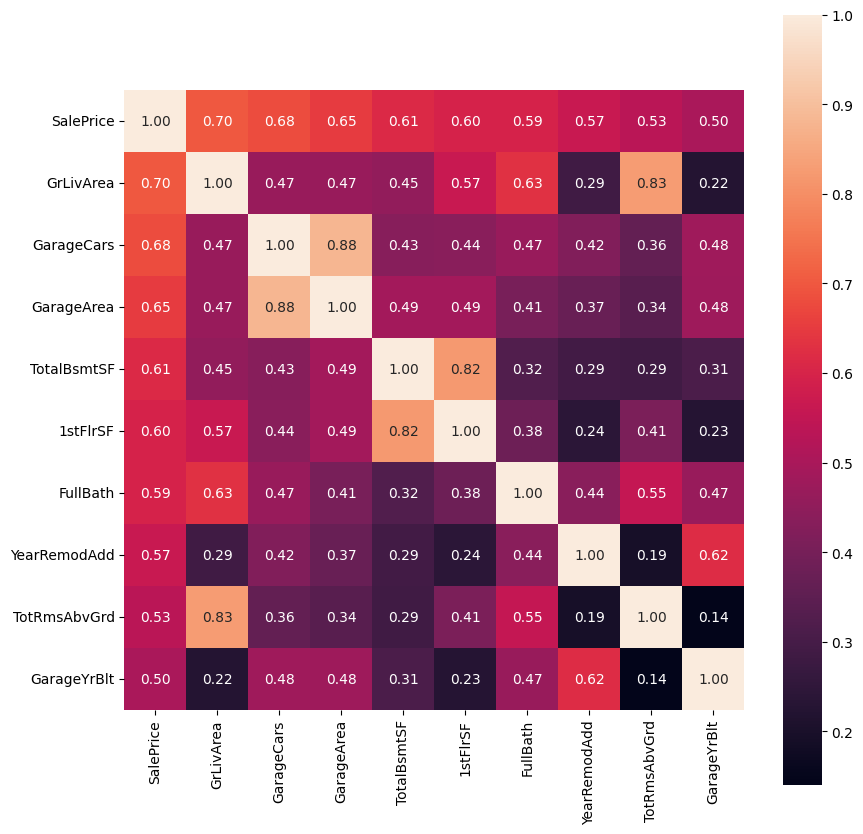

In [ ]:
k = 10
plt.figure(figsize=[10,10])
cols = housing_data.corr(numeric_only = True).nlargest(k,'SalePrice').index
cm = np.corrcoef(housing_data[cols].values.T)
sns.heatmap(cm,annot=True, square = True, fmt = '.2f', cbar = True, annot_kws = {'size':10},
            yticklabels = cols.values, xticklabels = cols.values)
plt.show()

# Conclusion

#### We can see that -
#### > GarageArea and GarageCars are highly correlated with coff of 0.88
#### > GrLiveArea and TotRmsAbvGrd are highly correlated with coff of 0.83
#### > TotalBsmtSF and 1stFlrSF are highly correlated with coff of 0.82

<Figure size 1000x700 with 0 Axes>

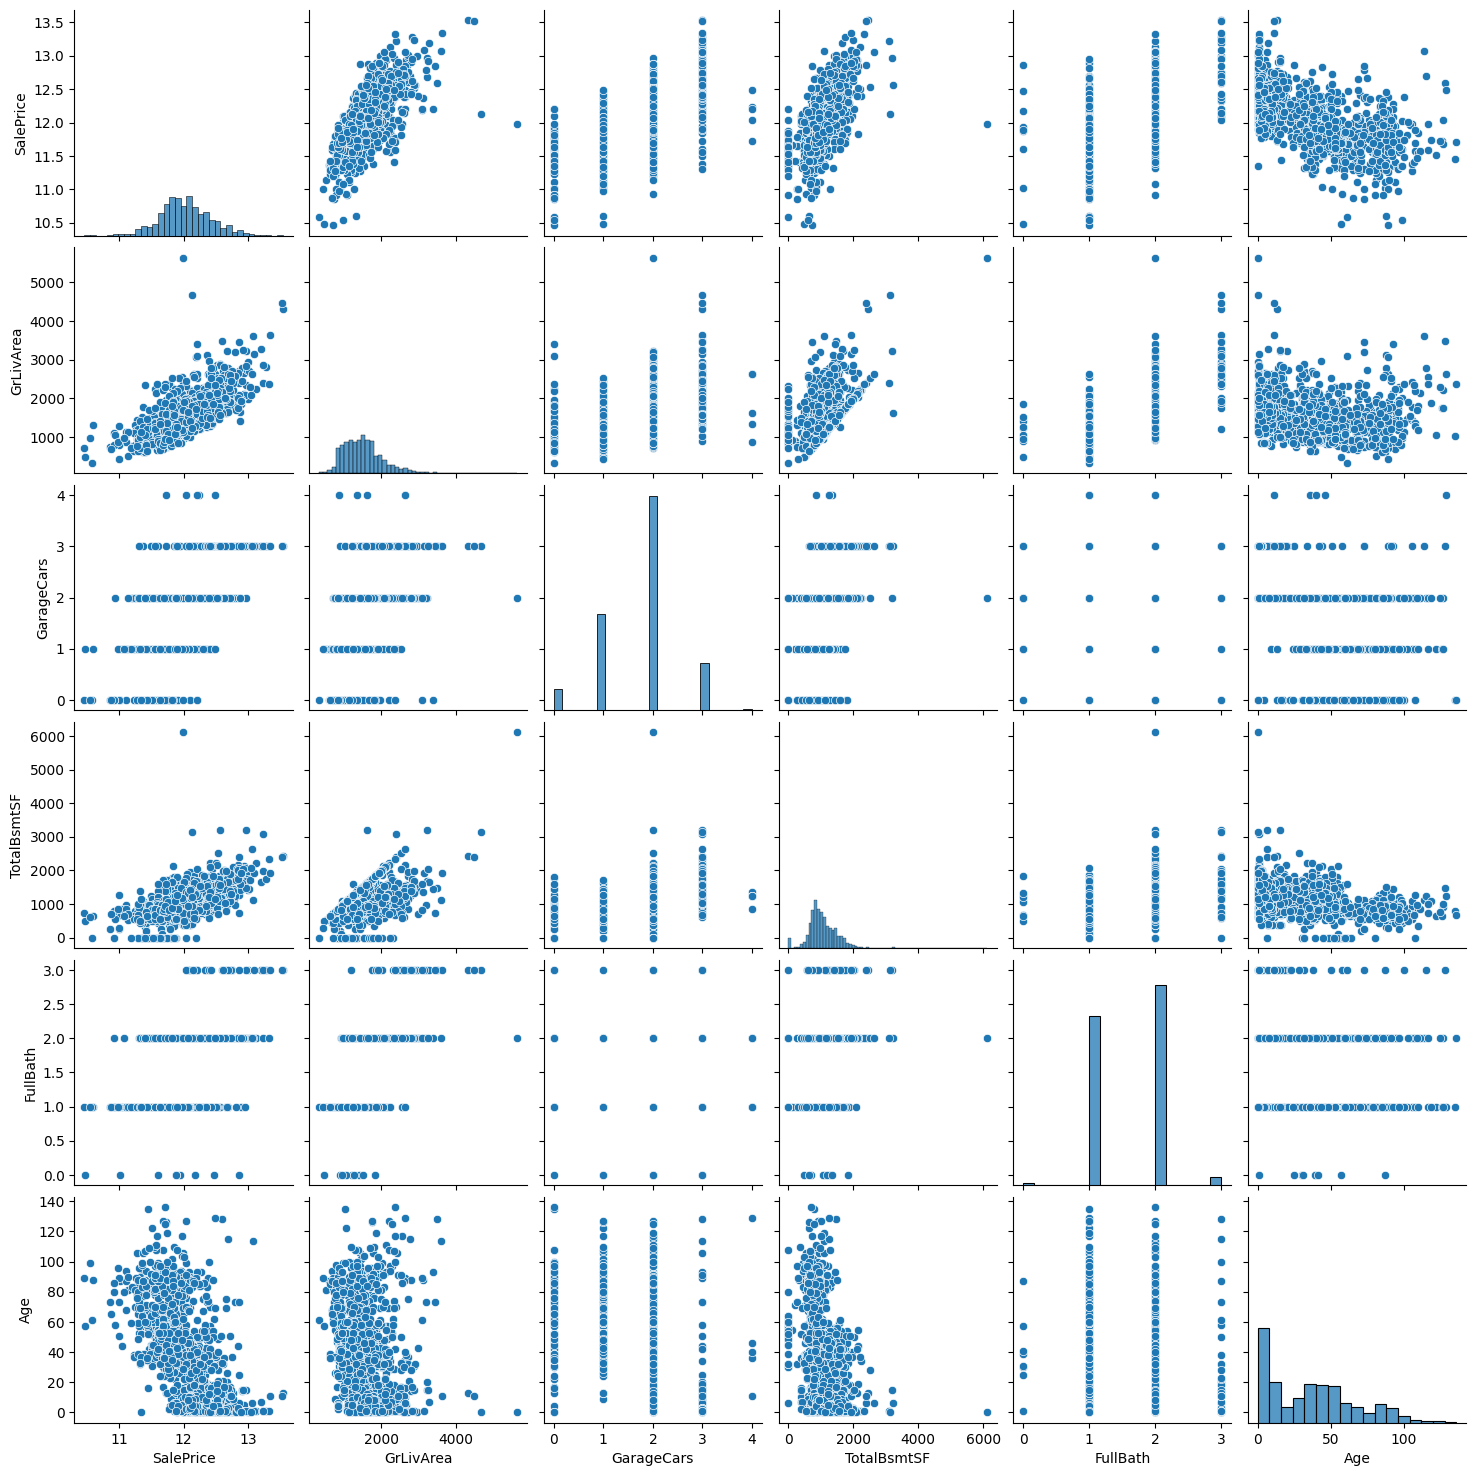

In [ ]:
# @title PairPlot for Numerical Columns
cols = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars","TotalBsmtSF","FullBath" ,"Age"]
plt.figure(figsize=[10,7])
sns.pairplot(housing_data[cols])
plt.show()

#### We can see that Age has negative correlation with target variable SalePrice and TotalBSmtSF and GrLivArea have postive correlation with SalePrice

# Step 4 : Data Preparation

###### Dummy Encoding

In [ ]:
housing_num = housing_data.select_dtypes(include= ['int64','float64'])
housing_cat = housing_data.select_dtypes(include= ['object'])

In [ ]:
housing_cat_dm = pd.get_dummies(housing_cat,drop_first = True, dtype= int)
housing_cat_dm

house = pd.concat([housing_num,housing_cat_dm],axis = 1)
house.head()

In [ ]:
# Splitting up the dataset
# First let's create the dependent and independent variable

#### Split into Target and Feature

In [ ]:
X = house.drop(['SalePrice'],axis=1).copy()
y = house['SalePrice'].copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [ ]:
# Scaling the Dataset
num_cols = list(X_train.select_dtypes(exclude='object').columns)

In [ ]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Creating a function to calculate  evaluation metrices

In [ ]:
def evaluate_metrices(y_train,y_train_pred,y_test,y_pred):
  # r^2 values for train and test data
  print("r2 score (train) = ",'%2.2f' % r2_score(y_train,y_train_pred))
  print("r2 score (test) = ",'%2.2f' % r2_score(y_test,y_pred))

  ## RMSE for train and test data
  mse_train = mean_squared_error(y_train,y_train_pred)
  mse_test = mean_squared_error(y_test,y_pred)

  rmse_train = np.sqrt(mse_train)
  rmse_test = np.sqrt(mse_test)

  print("RMSE(Train) = ", '%2.2f' % rmse_train)
  print("RMSE(Test) = ", '%2.2f' % rmse_test)

# Step 5: Build ML Model

In [ ]:
# Import ML Libs
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# Applying Ridge Regression with varying the hyperparameter 'Lambda'
params = { 'alpha':
          [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
         0.6, 0.7, 0.8, 0.9, 1.0,2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000]}
ridge = Ridge()
ridgeCV = GridSearchCV(estimator = ridge, param_grid = params, scoring = 'neg_mean_absolute_error', cv=5,
                       return_train_score = True, verbose =1, n_jobs = -1)
ridgeCV.fit(X_train,y_train)

In [ ]:
ridgeCV.best_params_

{'alpha': 100}

In [ ]:
ridgeCV.cv_results_

In [ ]:
ridge = Ridge(alpha = 100)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=100)

In [ ]:
ridge.coef_

In [ ]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [ ]:
evaluate_metrices(y_train, y_train_pred, y_test, y_pred)

r2 score (train) =  0.94
r2 score (test) =  0.87
RMSE(Train) =  0.10
RMSE(Test) =  0.16


In [ ]:
ridgeCV_result = pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_result

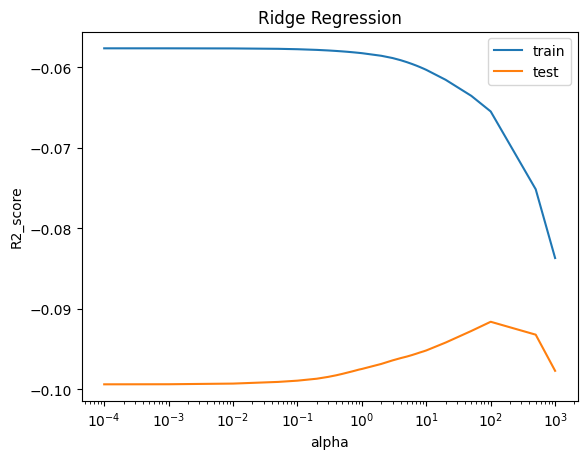

In [ ]:
plt.plot(ridgeCV_result['param_alpha'], ridgeCV_result['mean_train_score'], label = 'train')
plt.plot(ridgeCV_result['param_alpha'], ridgeCV_result['mean_test_score'], label = 'test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.title('Ridge Regression')
plt.legend()
plt.show()

In [ ]:
# Applying Lasso Regression with varying the hyperparameter 'Lambda'
lasso = Lasso()
lassoCV = GridSearchCV(estimator = lasso, param_grid = params, scoring = 'neg_mean_absolute_error', cv=5,
                       return_train_score = True, verbose =1, n_jobs = -1)
lassoCV.fit(X_train,y_train)

In [ ]:
lassoCV.best_params_

{'alpha': 0.001}

In [ ]:
lasso = Lasso(alpha = 0.001)

In [ ]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [ ]:
lasso.coef_

In [ ]:
y_train_pred1 = lasso.predict(X_train)
y_pred1 = lasso.predict(X_test)

In [ ]:
evaluate_metrices(y_train, y_train_pred1, y_test, y_pred1)

r2 score (train) =  0.94
r2 score (test) =  0.86
RMSE(Train) =  0.10
RMSE(Test) =  0.16


In [ ]:
lassoCV_result = pd.DataFrame(lassoCV.cv_results_)
lassoCV_result

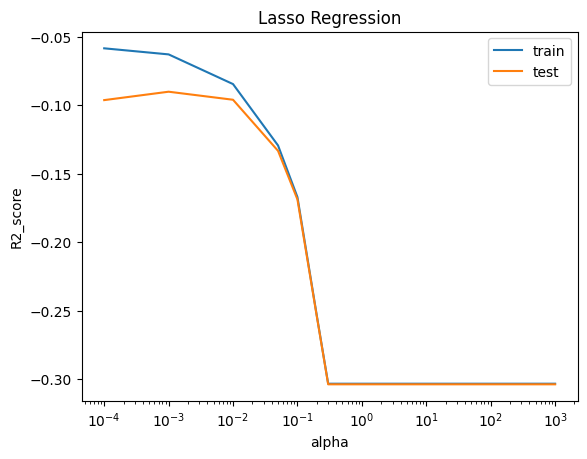

In [ ]:
plt.plot(lassoCV_result['param_alpha'], lassoCV_result['mean_train_score'], label = 'train')
plt.plot(lassoCV_result['param_alpha'], lassoCV_result['mean_test_score'], label = 'test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.title('Lasso Regression')
plt.legend()
plt.show()

## Feature Extraction/ Elimination

In [ ]:
betas = pd.DataFrame(index = X_train.columns)
betas.rows = X.columns

# Creating columns for Ridge and Lasso Coefficient against each feature
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [ ]:
#View the features removed by lasso
lasso_cols_removed = list(betas[betas['Lasso']==0].index)
print("lasso column removed:",lasso_cols_removed)

lasso_cols_selected = list(betas[betas['Lasso']!=0].index)
print("Lasso column selected",lasso_cols_selected)

print('Number of removed Lasso columns: ',len(lasso_cols_removed))
print('Number of selected Lasso columns: ',len(lasso_cols_selected))

lasso column removed: ['LotFrontage', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'GarageYrBlt', 'MiscVal', 'MoSold', 'MSSubClass_190', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSZoning_RM', 'LotShape_Reg', 'LandContour_Low', 'Neighborhood_BrDale', 'Neighborhood_Gilbert', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Condition1_Feedr', 'Condition1_PosA', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'OverallQual_6', 'OverallCond_6', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_Membran', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'MasVnrType_BrkFace', 'ExterQual_Gd', 'ExterCond_Gd', 'Foundation

##### Top 10 features significant in predicting the value of a house, both according to Ridge model and Lasso model

In [ ]:
# View the top 10 coefficient of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

In [ ]:
# We have to take inverse log of betas to interpret the ridge coefficents in terms of target variable
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending = False)[:10]

In [ ]:
# View the top 10 coefficient of Lasso regression in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

In [ ]:
# We have to take inverse log of betas to interpret the lasso coefficents in terms of target variable
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending = False)[:10]

# Conclusion:

### Below are the Top 10 features with corresponding coefficients according to Ridge model

######  - GrLivArea	1.045704
######  - 1stFlrSF	1.030758
######  - OverallQual_9	1.028232
######  - 2ndFlrSF	1.026525
######  - RoofMatl_Tar&Grv	1.025966
######  - OverallQual_8	1.025820
######  - GarageCars	1.025528
######  - PoolArea	1.024453
######  - RoofMatl_CompShg	1.022923
######  - Neighborhood_NridgHt	1.022469


### Below are the Top 10 features with corresponding coefficients according to Lasso model

######  - PoolArea	1.164807
######  - PoolQC_None	1.144479
######  - GrLivArea	1.117957
######  - OverallQual_9	1.032962
######  - OverallQual_8	1.032376
######  - RoofMatl_Tar&Grv	1.030344
######  - RoofMatl_CompShg	1.029419
######  - TotalBsmtSF	1.026382
######  - Neighborhood_Crawfor	1.023844
######  - GarageCars	1.023315

##### Few Inferences are:

##### - Therefore the price of the house will increase by 1.11 with the increase in GrLivArea
##### - The price of house can increase by 1.02 times if the finish of the house is very good.
##### - If the house has GarageCars the price may increase by 1.02 times
##### - If the house has Pool Area then the price can increase by 1.16 times.
##### - If the basement condition is typical then the house price may increase upto 1.03


##### The optimal value of lambda for Ridge Regression is 100
##### The optimal value of lambda for Lasso Regression is 0.001